# Hitchhiker's Guide to Machine Learning Algorithms in Python

This notebook/post/project will aim to implemement the most common machine learning algorithms in python. I believe above all else, this will be a good learning exercise for me. I just finished Andrew Ng's Machine Learning course on Coursera and while it is an excellent course, it's quite light on practical implementation. This aims to bridge that gap. 

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Supervised Learning

The majority of the algorithms covered here will be of the supervised variety. What this means is that we know the correct answers going into implementation. So we can correct the algorithm and identify error points and other things of that nature, serving as something of a 'teacher' role for the learning algorithm

### Linear Regression

Perhaps the most popular machine learning algorithm out there and definitely the most unappreciated. Many data scientists get caught up and forget that simpler is almost always perferred over complex when performance is similar. 

Anyways, linear regression is a supervised learning algorithm that predicts an outcome based on continuous features. Linear regression is a versitile algorithm that has the ability to be run on a single variable (simple linear regression) or on many features (multiple linear regression). The way it works is by assigning optimal weights to the variables in order to create a line (ax + b) that will be used to predict output.

#### Getting Started

In [9]:
from sklearn import linear_model
df = pd.read_csv('linear_regression_df.csv')
df.columns = ['X', 'Y']
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


#### Visualization

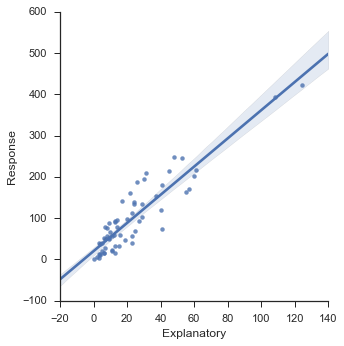

In [10]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('X','Y', data=df)
plt.ylabel('Response')
plt.xlabel('Explanatory')

#### Implementation 

In [11]:
linear = linear_model.LinearRegression()

trainX = np.asarray(df.X[20:len(df.X)]).reshape(-1, 1)
trainY = np.asarray(df.Y[20:len(df.Y)]).reshape(-1, 1)

testX = np.asarray(df.X[:20]).reshape(-1, 1)
testY = np.asarray(df.Y[:20]).reshape(-1, 1)

linear.fit(trainX, trainY)
linear.score(trainX, trainY)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('R^2 Value: \n', linear.score(trainX, trainY))

predicted = linear.predict(testX)

Coefficient: 
 [[ 3.43948437]]
Intercept: 
 [ 24.00493255]
R^2 Value: 
 0.703654905355


### Logistic Regression

First and foremost, logistic regression is a supervised classification algorithm and therefore is useful for estimating discrete values. It is typically used for predicting the probability of an event using the logistic function in order to get an output between 0 and 1. 

When first learning this alogrithm, I was under the impression that it was a sort of a niche thing and therefore didn't give it my full attention. I couldn't have been more wrong. Some of the underlying aspects of logistic regression come up in many other important machine learning algorithms like neural networks.

#### Getting Started

In [12]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('logistic_regression_df.csv')
df.columns = ['X', 'Y']
df.head()

,X,Y
0,26.6,0
1,23.3,1
2,28.1,0
3,43.1,1
4,25.6,0


#### Visualization

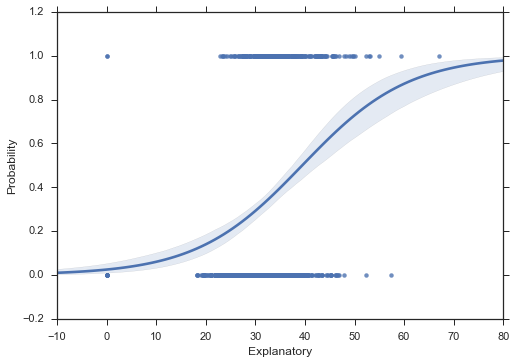

In [13]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.regplot('X','Y', data=df, logistic=True)
plt.ylabel('Probability')
plt.xlabel('Explanatory')

#### Implementation

In [14]:
logistic = LogisticRegression()
X = (np.asarray(df.X)).reshape(-1, 1)
Y = (np.asarray(df.Y)).ravel()

logistic.fit(X, Y)
logistic.score(X, Y)

print('Coefficient: \n', logistic.coef_)
print('Intercept: \n', logistic.intercept_)
print('R^2 Value: \n', logistic.score(X, Y))

Coefficient: 
 [[ 0.07861888]]
Intercept: 
 [-3.17496229]
R^2 Value: 
 0.670143415906


### Decision Trees

Decision trees are a form of supervised learning that can be used for both classification and regression purposes. With this being said, in my experience they are typically utilized for classification purposes. The model takes in an instance and goes down the tree, testing significant features against a determined conditional statement. Depending on the result, it will go down to the left or right child branch and onward after that. Typically the most significant feature in the process will fall closer to the root of the tree. Decision trees are becoming increasingly popular and can serve as a strong learning algorithm for any data scientist to have in their repatoire - especially when coupled with techniques like random forests, boosting, and bagging.

#### Getting Started

In [15]:
from sklearn import tree
df = pd.read_csv('iris_df.csv')
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df.head()

,X1,X2,X3,X4,Y
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### Implementation

In [16]:
from sklearn.cross_validation import train_test_split

decision = tree.DecisionTreeClassifier(criterion='gini')

X = df.values[:, 0:4]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)

decision.fit(trainX, trainY)
print('Accuracy: \n', decision.score(testX, testY))

Accuracy: 
 0.933333333333


#### Visualization

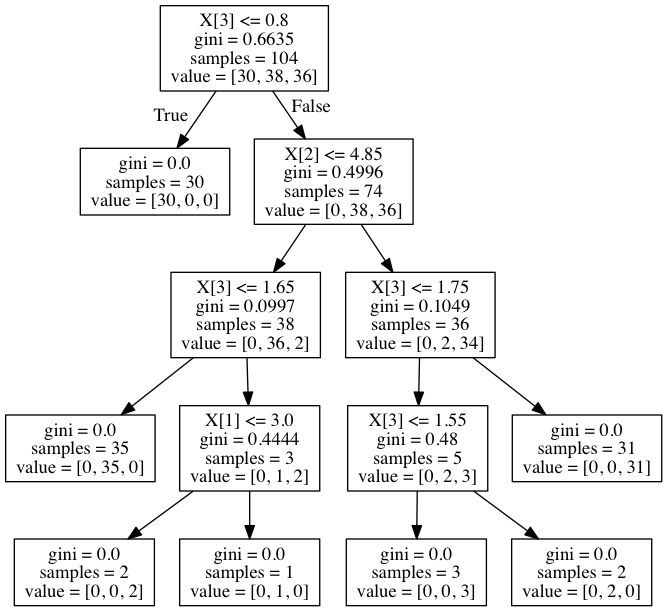

In [17]:
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydotplus as pydot

dot_data = StringIO()
tree.export_graphviz(decision, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

### Support Vector Machines

Support vector machines are a popular supervised classification algorithm that towards creating a dividing line between the different categories of data. The way this vector is calculated, in simple terms, is by optimizing the line so that the closest point in each of the groups will be farthest away from each other. This vector is by default and often visualized as being linear, this doesn't have to always be the case. The vector can take a nonlinear form as well is the kernel type is changed from the default type of 'gaussian' or linear. 

#### Geting Started

In [18]:
from sklearn import svm
df = pd.read_csv('iris_df.csv')
df.columns = ['X4', 'X3', 'X1', 'X2', 'Y']
df = df.drop(['X4', 'X3'], 1)
df.head()

,X1,X2,Y
0,1.4,0.2,Iris-setosa
1,1.3,0.2,Iris-setosa
2,1.5,0.2,Iris-setosa
3,1.4,0.2,Iris-setosa
4,1.7,0.4,Iris-setosa


#### Implementation

In [19]:
from sklearn.cross_validation import train_test_split

support = svm.SVC()

X = df.values[:, 0:2]
Y = df.values[:, 2]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)

support.fit(trainX, trainY)
print('Accuracy: \n', support.score(testX, testY))

pred = support.predict(testX)

Accuracy: 
 0.977777777778


#### Visualization

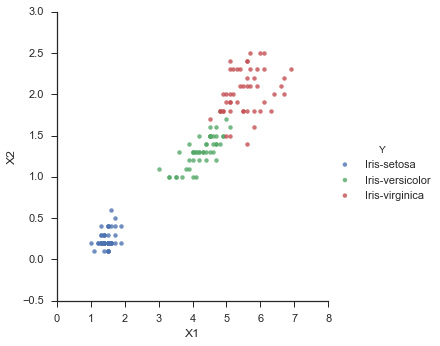

In [20]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('X1','X2', scatter=True, fit_reg=False, data=df, hue='Y')
plt.ylabel('X2')
plt.xlabel('X1')

### K-Nearest Neighbors

K-Nearest Neighbors or KNN for short, is a supervised learning algorithm specializing in classification. The algorithm  looks at different centroids and compares distance using some sort of function (usually Euclidean), then analyzes those results and assigns each point to the group so that it is optimized to be with all of its 'nearest neighbors'. 

#### Getting Started

In [21]:
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv('iris_df.csv')
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df = df.drop(['X4', 'X3'], 1)
df.head()

,X1,X2,Y
0,4.9,3.0,Iris-setosa
1,4.7,3.2,Iris-setosa
2,4.6,3.1,Iris-setosa
3,5.0,3.6,Iris-setosa
4,5.4,3.9,Iris-setosa


#### Visualization

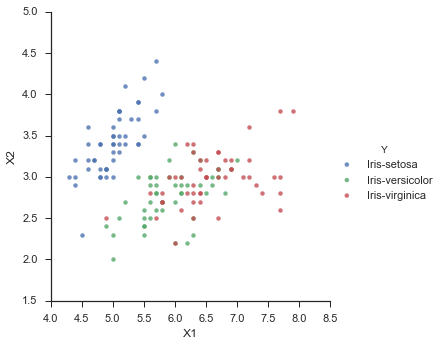

In [22]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('X1','X2', scatter=True, fit_reg=False, data=df, hue='Y')
plt.ylabel('X2')
plt.xlabel('X1')

#### Implementation

In [24]:
from sklearn.cross_validation import train_test_split

neighbors = KNeighborsClassifier(n_neighbors=5)

X = df.values[:, 0:2]
Y = df.values[:, 2]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)

neighbors.fit(trainX, trainY)
print('Accuracy: \n', neighbors.score(testX, testY))

pred = neighbors.predict(testX)

Accuracy: 
 0.688888888889


### Random Forests

Random forests are a popular supervised ensemble learning algorithm. 'Ensemble' meaning that it takes a bunch of 'weak learners' and has them work together to form one strong predictor. In this case, the weak learners are all randomly implemented decision trees that are brought together to form the strong predictor - a random forest. 

#### Getting Started

In [86]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('iris_df.csv')
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df.head()

,X1,X2,X3,X4,Y
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### Implementation

In [88]:
from sklearn.cross_validation import train_test_split

forest = RandomForestClassifier()

X = df.values[:, 0:4]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)

forest.fit(trainX, trainY)
print('Accuracy: \n', forest.score(testX, testY))

pred = forest.predict(testX)

Accuracy: 
 0.955555555556


## Unsupervised Learning

For unsupervised learning, we don't necessarily have a specific feature that we are trying to predict. Instead the algorithm will attempt to find something on its own without the help of us serving as the 'teacher'. This is in large part used for insights regarding things like clustering. 

### K-Means Clustering

K-Means is a popular unsupervised learning classification algorithm typically used to address the clustering problem. The 'K' refers to the user inputted number of clusters. The algorithm begins with randomly selected points and then optimizes the clusters using a distance formula to find the best grouping of data points. It is ultimately up to the data scientist to select the correct 'K' value. 

#### Getting Started

In [89]:
from sklearn.cluster import KMeans
df = pd.read_csv('iris_df.csv')
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df = df.drop(['X4', 'X3'], 1)
df.head()

,X1,X2,Y
0,4.9,3.0,Iris-setosa
1,4.7,3.2,Iris-setosa
2,4.6,3.1,Iris-setosa
3,5.0,3.6,Iris-setosa
4,5.4,3.9,Iris-setosa


#### Implementation

In [83]:
from sklearn.cross_validation import train_test_split

kmeans = KMeans(n_clusters=3)
X = df.values[:, 0:2]
kmeans.fit(X)
df['Pred'] = kmeans.predict(X)
df.head()

,X1,X2,Y,Pred
0,4.9,3.0,Iris-setosa,2
1,4.7,3.2,Iris-setosa,2
2,4.6,3.1,Iris-setosa,2
3,5.0,3.6,Iris-setosa,2
4,5.4,3.9,Iris-setosa,2


#### Visualization

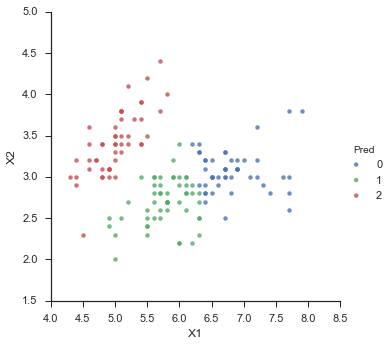

In [85]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('X1','X2', scatter=True, fit_reg=False, data=df, hue = 'Pred')

### Principal Components Analysis

PCA is a dimensionality reduction algorithm that can do a couple of things for data scientists. Most importantly, it can dramatically reduce the computational footprint of a model or analysis when dealing with hundreds or thousands of different features. It is unsupervised but the user should analyze the results and make sure they are keeping 95% or so of the original dataset's behavior.

#### Getting Started

In [91]:
from sklearn import decomposition
df = pd.read_csv('iris_df.csv')
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df.head()

,X1,X2,X3,X4,Y
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### Implementation

In [107]:
from sklearn import decomposition

pca = decomposition.PCA()
fa = decomposition.FactorAnalysis()

X = df.values[:, 0:4]
Y = df.values[:, 4]
train, test = train_test_split(X,test_size = 0.3)

train_reduced = pca.fit_transform(train)
test_reduced = pca.transform(test)

pca.n_components_

4